In [1]:
#SVM
# performing linear algebra 
import numpy as np  
  
# data processing 
import pandas as pd 
  
# visualisation 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

In [2]:

dataset = pd.read_csv("HR_comma_sep1.csv") 
print (dataset.head) 

<bound method NDFrame.head of        satisfaction_level  left  last_evaluation  number_project  \
0                    0.38     1             0.53               2   
1                    0.80     1             0.86               5   
2                    0.11     1             0.88               7   
3                    0.72     1             0.87               5   
4                    0.37     1             0.52               2   
...                   ...   ...              ...             ...   
14994                0.40     1             0.57               2   
14995                0.37     1             0.48               2   
14996                0.37     1             0.53               2   
14997                0.11     1             0.96               6   
14998                0.37     1             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  \
0                       157                   3              0   
1                    

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
left                     14999 non-null int64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
promotion_last_5years    14999 non-null int64
Department               14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
dataset.describe()

,satisfaction_level,left,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.238083,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268
std,0.248631,0.425924,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281
min,0.090000,0.000000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000
25%,0.440000,0.000000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000
50%,0.640000,0.000000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000
75%,0.820000,0.000000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000


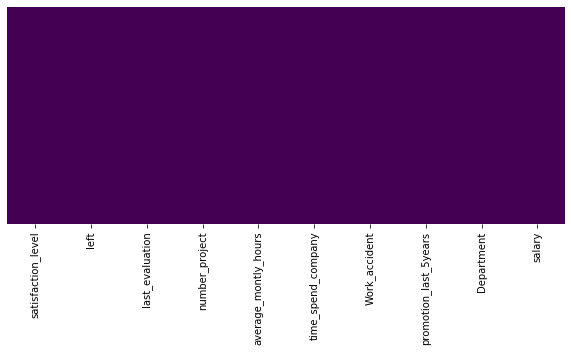

In [5]:
# heatmap to check the missing value 
plt.figure(figsize =(10, 4)) 
sns.heatmap(dataset.isnull(), yticklabels = False, cbar = False, cmap ='viridis')

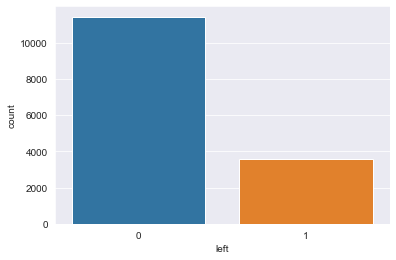

In [6]:
sns.set_style('darkgrid') 
sns.countplot(x ='left', data = dataset) 

In [7]:
len(object_col)

NameError: name 'object_col' is not defined

In [8]:

y = dataset.iloc[:, 1] 
x = dataset 
x.drop('left', axis = 1, inplace = True)

In [9]:
from sklearn.preprocessing import LabelEncoder 
lb = LabelEncoder() 
y = lb.fit_transform(y) 

In [10]:
 
dum_Department = pd.get_dummies(dataset['Department'],  
                                prefix ='Department') 
dum_salary = pd.get_dummies(dataset['salary'],  
                                prefix ='salary') 

# Adding these dummy variable to input X 
X = pd.concat([x, dum_Department,  
               dum_salary], axis = 1) 
# Removing the categorical data 
X.drop(['Department', 'salary'],  
        axis = 1, inplace = True) 
  
print(X.shape) 
print(y.shape) 

(14999, 20)
(14999,)


In [11]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( 
    X, y, test_size = 0.25, random_state = 40)

In [12]:
from sklearn.svm import SVC

In [13]:
model=SVC()

In [14]:
model.fit(X_train,y_train) 

C:\Users\Aynur\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [15]:
predictions=model.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix,matthews_corrcoef

In [16]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))
print('\n')
print(matthews_corrcoef(y_test,predictions))

[[2756  113]
 [  75  806]]


              precision    recall  f1-score   support

           0       0.97      0.96      0.97      2869
           1       0.88      0.91      0.90       881

    accuracy                           0.95      3750
   macro avg       0.93      0.94      0.93      3750
weighted avg       0.95      0.95      0.95      3750



0.8629253274976396


In [17]:
from sklearn.model_selection import GridSearchCV

In [18]:
param_grid={'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}

In [19]:
grid=GridSearchCV(SVC(),param_grid,verbose=3)

In [20]:
grid.fit(X_train,y_train)

C:\Users\Aynur\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.777, total=  10.6s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.5s remaining:    0.0s


[CV] ...................... C=0.1, gamma=1, score=0.771, total=  10.4s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   20.9s remaining:    0.0s


[CV] ...................... C=0.1, gamma=1, score=0.775, total=  10.3s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.924, total=   4.8s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.928, total=   4.4s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.922, total=   4.5s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................... C=0.1, gamma=0.01, score=0.874, total=   3.3s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................... C=0.1, gamma=0.01, score=0.872, total=   3.2s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................... C=0.1, gamma=0.01, score=0.867, total=   3.4s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .

[CV] ..................... C=1000, gamma=1, score=0.939, total=  12.1s
[CV] C=1000, gamma=1 .................................................
[CV] ..................... C=1000, gamma=1, score=0.945, total=  10.7s
[CV] C=1000, gamma=1 .................................................
[CV] ..................... C=1000, gamma=1, score=0.944, total=  11.0s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ................... C=1000, gamma=0.1, score=0.959, total=   2.4s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ................... C=1000, gamma=0.1, score=0.960, total=   2.4s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ................... C=1000, gamma=0.1, score=0.955, total=   2.2s
[CV] C=1000, gamma=0.01 ..............................................
[CV] .................. C=1000, gamma=0.01, score=0.961, total=   8.1s
[CV] C=1000, gamma=0.01 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:  5.9min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [21]:
grid.best_params_

{'C': 10, 'gamma': 0.1}

In [22]:
grid.best_estimator_

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [23]:
grid_predictions=grid.predict(X_test)

In [24]:
print(confusion_matrix(y_test,grid_predictions))
print('\n')
print(classification_report(y_test,grid_predictions))
print('\n')
print("MCC               ",matthews_corrcoef(y_test,grid_predictions))

[[2792   77]
 [  55  826]]


              precision    recall  f1-score   support

           0       0.98      0.97      0.98      2869
           1       0.91      0.94      0.93       881

    accuracy                           0.96      3750
   macro avg       0.95      0.96      0.95      3750
weighted avg       0.97      0.96      0.96      3750



MCC                0.9030387150939717
